In [19]:
import numpy as np
import pandas as pd
import math
import sklearn as sk

In [20]:
officer_data = pd.read_csv("capstat_expanded_dataset.csv")
complaints = pd.read_csv("CCRB_database_raw.csv")

In [3]:
complaints

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
0,7/14/2020,43921,Richard,Aalbue,POM,H BKLYN,3619.0,6290465.0,NaN,Force,Force,Unsubstantiated,NaN,NaN
1,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8300607.0,NaN,Force,Force,Complainant Unavailable,NaN,NaN
2,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8800504.0,2/15/1988,Force,Beat,Unsubstantiated,NaN,NaN
3,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/1992,Abuse of Authority,Vehicle Searched,Unsubstantiated,NaN,NaN
4,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/1992,Discourtesy,Nasty Words,Unsubstantiated,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323906,7/14/2020,77970,Paul,Zygas,POM,TB DT32,18838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323907,7/14/2020,61975,Mitchell,Zykofsky,SGT,PBMS,661.0,9200164.0,1/16/1992,Discourtesy,Nasty Words,Complaint Withdrawn,NaN,NaN
323908,7/14/2020,13114,Luke,Zylstra,POM,052 PCT,7073.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323909,7/14/2020,47743,Richard,Zyta,DT2,I.A.B.,4990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(complaints['Allegation'].isna().sum())

33683


In [21]:
df = complaints.dropna(subset=['Allegation','FADO Type'])

In [22]:
df

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
0,7/14/2020,43921,Richard,Aalbue,POM,H BKLYN,3619.0,6290465.0,NaN,Force,Force,Unsubstantiated,NaN,NaN
1,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8300607.0,NaN,Force,Force,Complainant Unavailable,NaN,NaN
2,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8800504.0,2/15/1988,Force,Beat,Unsubstantiated,NaN,NaN
3,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/1992,Abuse of Authority,Vehicle Searched,Unsubstantiated,NaN,NaN
4,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/1992,Discourtesy,Nasty Words,Unsubstantiated,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323901,7/14/2020,462,Charles,Zwilling,SGT,005 DET,2777.0,200707027.0,5/1/2007,Force,Physical force,Exonerated,NaN,NaN
323902,7/14/2020,462,Charles,Zwilling,SGT,005 DET,2777.0,200808381.0,6/11/2008,Abuse of Authority,Retaliatory summons,Substantiated (Charges),Instructions,Instruction
323903,7/14/2020,462,Charles,Zwilling,SGT,005 DET,2777.0,200808381.0,6/11/2008,Force,Physical force,Substantiated (Charges),No Disciplinary Action-DUP,Instruction
323904,7/14/2020,462,Charles,Zwilling,SGT,005 DET,2777.0,201704488.0,6/2/2017,Abuse of Authority,Other,Exonerated,NaN,NaN


In [53]:
df2 = df[['Unique Id', 'Rank', 'Command','FADO Type', 'Allegation']]
df2

,Unique Id,Rank,Command,FADO Type,Allegation
0,43921,POM,H BKLYN,Force,Force
1,52580,LT,MOUNTED,Force,Force
2,52580,LT,MOUNTED,Force,Beat
3,52580,LT,MOUNTED,Abuse of Authority,Vehicle Searched
4,52580,LT,MOUNTED,Discourtesy,Nasty Words
...,...,...,...,...,...
323901,462,SGT,005 DET,Force,Physical force
323902,462,SGT,005 DET,Abuse of Authority,Retaliatory summons
323903,462,SGT,005 DET,Force,Physical force
323904,462,SGT,005 DET,Abuse of Authority,Other


In [54]:
df2 = pd.get_dummies(df2, columns = ['FADO Type', 'Allegation'])

In [59]:
df2.head(25)

,Unique Id,Rank,Command,FADO Type_Abuse of Authority,FADO Type_Discourtesy,FADO Type_Force,FADO Type_Offensive Language,Allegation_Abuse of Authority,Allegation_Action,Allegation_Animal,...,Allegation_Threat re: removal to hospital,Allegation_Threat to Property,Allegation_Threat to damage/seize property,Allegation_Threat to notify ACS,Allegation_Vehicle,Allegation_Vehicle Searched,Allegation_Vehicle search,Allegation_Vehicle stop,Allegation_White,Allegation_Word
0,43921,POM,H BKLYN,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52580,LT,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52580,LT,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52580,LT,MOUNTED,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52580,0,MOUNTED,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,52580,2,MOUNTED,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,52580,0,MOUNTED,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52580,0,MOUNTED,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,52580,0,MOUNTED,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,52580,1,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df2.iloc[3,3]

1

In [75]:
df2 = df[['Unique Id', 'Rank', 'Command','FADO Type', 'Allegation']]
df2 = pd.get_dummies(df2, columns = ['FADO Type', 'Allegation'])
df2.reset_index(inplace = True, drop = True)
for x in df2.index:
    if x == 10:
        print(10)
    
    if x == 100:
        print(100)
        
    if x == 1000:
        print(1000)
        
    if x == 10000:
        print(10000)
    
    if x == 323907:
        break
    curid = df2['Unique Id'][x]
    y = x + 1
    trackid = df2['Unique Id'][y]
    while trackid == curid:
        for g in range(4,129):
            #print(g)
            newval = int(df2.iloc[x,g]) + int(df2.iloc[y,g])
            df2.iloc[x,g] = newval
        y += 1
        trackid = df2['Unique Id'][y]
            


10
100


KeyboardInterrupt: 

In [77]:
df2 = df[['Unique Id', 'Rank', 'Command','FADO Type', 'Allegation']]
df2 = pd.get_dummies(df2, columns = ['FADO Type', 'Allegation'])
df2.reset_index(inplace = True, drop = True)
df2

,Unique Id,Rank,Command,FADO Type_Abuse of Authority,FADO Type_Discourtesy,FADO Type_Force,FADO Type_Offensive Language,Allegation_Abuse of Authority,Allegation_Action,Allegation_Animal,...,Allegation_Threat re: removal to hospital,Allegation_Threat to Property,Allegation_Threat to damage/seize property,Allegation_Threat to notify ACS,Allegation_Vehicle,Allegation_Vehicle Searched,Allegation_Vehicle search,Allegation_Vehicle stop,Allegation_White,Allegation_Word
0,43921,POM,H BKLYN,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52580,LT,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52580,LT,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52580,LT,MOUNTED,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52580,LT,MOUNTED,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290223,462,SGT,005 DET,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290224,462,SGT,005 DET,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290225,462,SGT,005 DET,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290226,462,SGT,005 DET,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
##script used to process the allegations csv
df2 = df[['Unique Id', 'Rank', 'Command', 'First Name', 'Last Name', 'FADO Type', 'Allegation']]
df2 = pd.get_dummies(df2, columns = ['FADO Type', 'Allegation'])
df2.reset_index(inplace = True, drop = True)
count = 0
for x in df2['Unique Id'].unique():
   
    count += 1
    sub = df2[df2['Unique Id'] == x]
    sub2 = sub[['Unique Id','Rank', 'Command', 'First Name', 'Last Name']].iloc[0]
    sums = sub.sum(axis = 0, numeric_only = True)
    #sums['Unique Id'] = sums['Unique Id']/ len(sub)
    sums = sums[1:]
    row = pd.concat([sub2, sums])
    #df2 = df2.append(row, ignore_index = True)
    if count == 1:
        rows = np.array(row)
    else:
        rows = np.vstack((rows,row))       
    if count == 10:
        print(10)
    
    if count == 100:
        print(100)
        
    if count == 1000:
        print(1000)
        
    if count % 10000 == 0:
        print(count)
    



10
100
1000
10000
20000
30000
40000


In [25]:
rows.shape

(48259, 129)

In [29]:
rows

array([[43921, 'POM', 'H BKLYN', ..., 0, 0, 0],
       [52580, 'LT', 'MOUNTED', ..., 0, 0, 0],
       [25775, 'POM', '107 PCT', ..., 0, 0, 0],
       ...,
       [63957, 'LT', 'POL ACD', ..., 0, 0, 0],
       [462, 'SGT', '005 DET', ..., 0, 0, 0],
       [61975, 'SGT', 'PBMS', ..., 0, 0, 0]], dtype=object)

In [27]:
df2

,Unique Id,Rank,Command,First Name,Last Name,FADO Type_Abuse of Authority,FADO Type_Discourtesy,FADO Type_Force,FADO Type_Offensive Language,Allegation_Abuse of Authority,...,Allegation_Threat re: removal to hospital,Allegation_Threat to Property,Allegation_Threat to damage/seize property,Allegation_Threat to notify ACS,Allegation_Vehicle,Allegation_Vehicle Searched,Allegation_Vehicle search,Allegation_Vehicle stop,Allegation_White,Allegation_Word
0,43921,POM,H BKLYN,Richard,Aalbue,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52580,LT,MOUNTED,Walter,Aanonsen,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52580,LT,MOUNTED,Walter,Aanonsen,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52580,LT,MOUNTED,Walter,Aanonsen,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52580,LT,MOUNTED,Walter,Aanonsen,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290223,462,SGT,005 DET,Charles,Zwilling,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
290224,462,SGT,005 DET,Charles,Zwilling,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290225,462,SGT,005 DET,Charles,Zwilling,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
290226,462,SGT,005 DET,Charles,Zwilling,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
roww = pd.DataFrame(data=rows, columns= df2.columns) 

In [31]:
roww

,Unique Id,Rank,Command,First Name,Last Name,FADO Type_Abuse of Authority,FADO Type_Discourtesy,FADO Type_Force,FADO Type_Offensive Language,Allegation_Abuse of Authority,...,Allegation_Threat re: removal to hospital,Allegation_Threat to Property,Allegation_Threat to damage/seize property,Allegation_Threat to notify ACS,Allegation_Vehicle,Allegation_Vehicle Searched,Allegation_Vehicle search,Allegation_Vehicle stop,Allegation_White,Allegation_Word
0,43921,POM,H BKLYN,Richard,Aalbue,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52580,LT,MOUNTED,Walter,Aanonsen,3,1,5,2,0,...,0,0,0,0,0,2,0,0,0,0
2,25775,POM,107 PCT,Gary,Aaronson,4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,72558,POM,SRG 1,Jacob,Aaronson,5,3,8,0,0,...,0,0,0,0,0,0,0,0,0,3
4,41738,DTS,ESS 07,Robert,Aasheim,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48254,55941,SGT,NARCBQN,Kevin,Zweigbaum,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48255,77969,SGT,TB DT32,Robert,Zwickis,5,2,5,1,0,...,0,0,0,0,0,0,0,0,0,0
48256,63957,LT,POL ACD,Patrick,Zwiebel,1,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
48257,462,SGT,005 DET,Charles,Zwilling,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
roww.to_csv("officer_infractions_with_names.csv")

In [32]:
df2.head()

,Unique Id,Rank,Command,FADO Type_Abuse of Authority,FADO Type_Discourtesy,FADO Type_Force,FADO Type_Offensive Language,Allegation_Abuse of Authority,Allegation_Action,Allegation_Animal,...,Allegation_Threat re: removal to hospital,Allegation_Threat to Property,Allegation_Threat to damage/seize property,Allegation_Threat to notify ACS,Allegation_Vehicle,Allegation_Vehicle Searched,Allegation_Vehicle search,Allegation_Vehicle stop,Allegation_White,Allegation_Word
0,43921,POM,H BKLYN,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52580,LT,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52580,LT,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52580,LT,MOUNTED,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52580,LT,MOUNTED,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
g = 7
x = 29
y = 31
df2.iloc[g,x] = df2.iloc[g,y]

In [22]:
df2 = df[['Unique Id', 'Rank', 'Command','FADO Type', 'Allegation']]
df2 = pd.get_dummies(df2, columns = ['FADO Type', 'Allegation'])
df2.reset_index(inplace = True, drop = True)
count = 0
#for x in df2['Unique Id']:
x = 52580
count += 1
sub = df2[df2['Unique Id'] == x]
sub2 = sub[['Unique Id','Rank', 'Command']].iloc[0]
sums = sub.sum(axis = 0, numeric_only = True)
#sums['Unique Id'] = sums['Unique Id']/ len(sub)
sums = sums[1:]
row = pd.concat([sub2, sums])
rows = np.array(row)
#np.append(rows,row,axis = 0)

#df2 = df2.append(row, ignore_index = True)
np.vstack((rows,row))

array([[52580, 'LT', 'MOUNTED', 3, 1, 5, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0],
       [52580, 'LT', 'MOUNTED', 3, 1, 5, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0]], dtype=object)

In [60]:
df2.iloc[12]['Unique Id']

25775

In [72]:
df2 = df[['Unique Id', 'Rank', 'Command','FADO Type', 'Allegation']]
df2 = pd.get_dummies(df2, columns = ['FADO Type', 'Allegation'])
df2.reset_index(inplace = True, drop = True)
#df2.drop('index')
df2.head(20)

,Unique Id,Rank,Command,FADO Type_Abuse of Authority,FADO Type_Discourtesy,FADO Type_Force,FADO Type_Offensive Language,Allegation_Abuse of Authority,Allegation_Action,Allegation_Animal,...,Allegation_Threat re: removal to hospital,Allegation_Threat to Property,Allegation_Threat to damage/seize property,Allegation_Threat to notify ACS,Allegation_Vehicle,Allegation_Vehicle Searched,Allegation_Vehicle search,Allegation_Vehicle stop,Allegation_White,Allegation_Word
0,43921,POM,H BKLYN,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52580,LT,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52580,LT,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52580,LT,MOUNTED,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52580,LT,MOUNTED,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,52580,LT,MOUNTED,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,52580,LT,MOUNTED,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52580,LT,MOUNTED,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,52580,LT,MOUNTED,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,52580,LT,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df2

,level_0,index,Unique Id,Rank,Command,FADO Type_Abuse of Authority,FADO Type_Discourtesy,FADO Type_Force,FADO Type_Offensive Language,Allegation_Abuse of Authority,...,Allegation_Threat re: removal to hospital,Allegation_Threat to Property,Allegation_Threat to damage/seize property,Allegation_Threat to notify ACS,Allegation_Vehicle,Allegation_Vehicle Searched,Allegation_Vehicle search,Allegation_Vehicle stop,Allegation_White,Allegation_Word
0,0,0,43921,POM,H BKLYN,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,52580,LT,MOUNTED,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,52580,LT,MOUNTED,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,52580,LT,MOUNTED,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,4,52580,0,MOUNTED,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290223,290223,323901,462,SGT,005 DET,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
290224,290224,323902,462,SGT,005 DET,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290225,290225,323903,462,SGT,005 DET,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
290226,290226,323904,462,SGT,005 DET,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df2

,Unique Id,Rank,Command,FADO Type_Abuse of Authority,FADO Type_Discourtesy,FADO Type_Force,FADO Type_Offensive Language,Allegation_Abuse of Authority,Allegation_Action,Allegation_Animal,...,Allegation_Threat re: removal to hospital,Allegation_Threat to Property,Allegation_Threat to damage/seize property,Allegation_Threat to notify ACS,Allegation_Vehicle,Allegation_Vehicle Searched,Allegation_Vehicle search,Allegation_Vehicle stop,Allegation_White,Allegation_Word
0,43921,POM,H BKLYN,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52580,LT,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52580,LT,MOUNTED,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52580,LT,MOUNTED,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52580,LT,MOUNTED,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290223,462,SGT,005 DET,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290224,462,SGT,005 DET,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290225,462,SGT,005 DET,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290226,462,SGT,005 DET,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df2['Unique Id'].unique().size

48259

In [6]:
roww = pd.read_csv('officer_infractions.csv')

In [7]:
clustp1 = roww[['Unique Id','Rank', 'Command']]
clustp2 = roww.iloc[:,3:]
clustp2

,Command,FADO Type_Abuse of Authority,FADO Type_Discourtesy,FADO Type_Force,FADO Type_Offensive Language,Allegation_Abuse of Authority,Allegation_Action,Allegation_Animal,Allegation_Arrest/D. A. T.,Allegation_Arrest/Onlooker,...,Allegation_Threat re: removal to hospital,Allegation_Threat to Property,Allegation_Threat to damage/seize property,Allegation_Threat to notify ACS,Allegation_Vehicle,Allegation_Vehicle Searched,Allegation_Vehicle search,Allegation_Vehicle stop,Allegation_White,Allegation_Word
0,H BKLYN,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MOUNTED,3,1,5,2,0,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0
2,107 PCT,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,SRG 1,5,3,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,ESS 07,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48254,NARCBQN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48255,TB DT32,5,2,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,POL ACD,1,1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48257,005 DET,2,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
clustp1

,Unique Id,Rank,Command
0,43921,POM,H BKLYN
1,52580,LT,MOUNTED
2,25775,POM,107 PCT
3,72558,POM,SRG 1
4,41738,DTS,ESS 07
...,...,...,...
48254,55941,SGT,NARCBQN
48255,77969,SGT,TB DT32
48256,63957,LT,POL ACD
48257,462,SGT,005 DET


In [9]:
from sklearn.cluster import KMeans
inert = list()
for x in range(2,10):
    kmeans = KMeans(n_clusters=x).fit(clustp2)
    inert.append(kmeans.inertia_)
#clusters = kmeans.labels_

ValueError: could not convert string to float: 'PBMS'

In [ ]:
len(inert)

ValueError: x and y must have same first dimension, but have shapes (8,) and (0,)

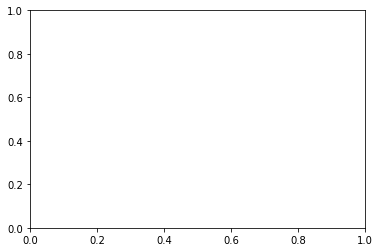

In [10]:
import matplotlib.pyplot as plt
plt.plot([2, 3, 4, 5, 6, 7, 8, 9],inert)
#plt.axis([2, 3, 4, 5, 6, 7, 8, 9])
plt.show()

In [ ]:
kmeans.inertia_

In [11]:
clusters = pd.Series(clusters)
clusters.head(25)

NameError: name 'clusters' is not defined

In [12]:
kmeans = KMeans(n_clusters=4).fit(clustp2)
clustp1['cluster'] = kmeans.labels_

NameError: name 'kmeans' is not defined

In [13]:
clustp1

,Unique Id,Rank,Command
0,43921,POM,H BKLYN
1,52580,LT,MOUNTED
2,25775,POM,107 PCT
3,72558,POM,SRG 1
4,41738,DTS,ESS 07
...,...,...,...
48254,55941,SGT,NARCBQN
48255,77969,SGT,TB DT32
48256,63957,LT,POL ACD
48257,462,SGT,005 DET


In [14]:
clustp3 = roww[['Unique Id','Rank', 'Command']]
clustp3

,Unique Id,Rank,Command
0,43921,POM,H BKLYN
1,52580,LT,MOUNTED
2,25775,POM,107 PCT
3,72558,POM,SRG 1
4,41738,DTS,ESS 07
...,...,...,...
48254,55941,SGT,NARCBQN
48255,77969,SGT,TB DT32
48256,63957,LT,POL ACD
48257,462,SGT,005 DET


In [15]:
df3 = pd.get_dummies(clustp3, columns = ['Rank', 'Command'])
df3

,Unique Id,Rank_AC,Rank_CBN,Rank_CCA,Rank_CCC,Rank_CCP,Rank_CCT,Rank_CD,Rank_CIA,Rank_CMA,...,Command_VED Q,Command_VED ZN1,Command_VED ZN2,Command_VICE,Command_VICE ED,Command_WARRSEC,Command_WTC CMD,Command_YTH DIV,Command_YTH SD,Command_YTH SS
0,43921,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52580,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25775,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,72558,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41738,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48254,55941,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48255,77969,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,63957,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48257,462,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
clustp4 = df3.iloc[:,1:]
clustp4

,Rank_AC,Rank_CBN,Rank_CCA,Rank_CCC,Rank_CCP,Rank_CCT,Rank_CD,Rank_CIA,Rank_CMA,Rank_CMS,...,Command_VED Q,Command_VED ZN1,Command_VED ZN2,Command_VICE,Command_VICE ED,Command_WARRSEC,Command_WTC CMD,Command_YTH DIV,Command_YTH SD,Command_YTH SS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
kmeans2 = KMeans(n_clusters=4).fit(clustp4)
clustp1['cluster2'] = kmeans2.labels_
clustp1

C:\Users\darin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unique Id,Rank,Command,cluster2
0,43921,POM,H BKLYN,2
1,52580,LT,MOUNTED,0
2,25775,POM,107 PCT,2
3,72558,POM,SRG 1,2
4,41738,DTS,ESS 07,0
...,...,...,...,...
48254,55941,SGT,NARCBQN,1
48255,77969,SGT,TB DT32,1
48256,63957,LT,POL ACD,0
48257,462,SGT,005 DET,1


In [18]:
clustp1[['clusters','cluster2']].head(25)

KeyError: "['clusters'] not in index"

In [ ]:
kmeans2.inertia_

In [ ]:
kmeans.inertia_ * (126/738)